In [1]:
# Example fitting a standard attenuator out (A0) RHESSI flare (microflare)
# 
# 6 detectors simulatenously

# 09-Jul-2024 IGH

In [49]:
from astropy.time import Time, TimeDelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sunpy.io.special import read_genx
# This work with v0.4.1
from sunkit_spex.fitting_legacy.fitter import Fitter
from sunkit_spex import thermal

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [3]:
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Ubuntu",'mathtext.default':"regular"})

In [ ]:
# Load in the new thermal model CHIANTI files
# Updated lines but also lower resolution temperature binning
# thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters('/Users/iain/github/fvth_stuff/better_chxdb/chianti_cont_1_250_unity_v101_t71.sav')
# thermal.LINE_GRID=thermal.setup_line_parameters('/Users/iain/github/fvth_stuff/better_chxdb//chianti_lines_1_12_unity_v101_t71.sav')

In [4]:
# Return a string with a trailing 0 if <10
def ldz_int(num):
    if num<10:
        return f'0{int(num):d}'
    if num >=10:
        return f'{int(num):d}'
# Convert astropy time into break_time sswidl format used for the filenames
def break_time(time):
    t=time.ymdhms
    stime=f'{t.year:d}'+ldz_int(t.month)+ldz_int(t.day)+'_'+\
        ldz_int(t.hour)+ldz_int(t.minute)+ldz_int(t.second)
    return stime

In [5]:
# Use the genx file info for the times and the filename
res=read_genx('../wee_fig9.genx')
nf=len(res["SAVEGEN0"])
ftims=[]
btims=[]
fname=[]

for f in range(nf):
    ftims.append(Time(res["SAVEGEN0"][f]["FPEAK_TR"],format='isot'))
    btims.append(Time(res["SAVEGEN0"][f]["BK_BF_TR"],format='isot'))
    # spec and srm fits are bk_bf_tr[0]-4s    
    # tt=Time(res["SAVEGEN0"][f]["BK_BF_TR"],format='isot')[0]-TimeDelta(16,format='sec')
    tt=Time(res["SAVEGEN0"][f]["FPEAK"],format='isot')

    fname.append(break_time(tt))

In [6]:
# Some setup for sunxspex
time_profile_size = (9,6)
spec_single_plot_size = (6,8)
spec_plot_size = (16,10)
spec_font_size = 18
default_font_size = 10
xlims, ylims = [3,30], [5e-2,3e4]
tol = 1e-5

fdir="/Users/iain/github/rhessi_spectra/shi_ex/"
_dir = "/Users/iain/github/rhessi_spectra/mfstats9_fits/"

In [7]:
time_profile_size = (9,6)
spec_plot_size = (6.5,7.5)
tol = 1e-20
spec_font_size = 7
default_text = 9
xlims, ylims = [3,30], [5e-4,1e4]

In [8]:
dets=['d1','d3','d4','d6','d8','d9']
id=3
files_spec=[_dir+fname[id]+"_spec_org_"+d+"_sf1.fits" for d in dets]
files_srm=[_dir+fname[id]+"_srm_org_"+d+"_sf1.fits" for d in dets]
# print(files_spec)


In [9]:
spec = Fitter(pha_file=files_spec,srm_file=files_srm)

In [10]:
for s in range(6):
    spec.data.loaded_spec_data['spectrum'+str(int(s+1))].start_background_time = btims[id].isot[0][:19]
    spec.data.loaded_spec_data['spectrum'+str(int(s+1))].end_background_time = btims[id].isot[1][:19]
    spec.data.loaded_spec_data['spectrum'+str(int(s+1))].start_event_time = ftims[id].isot[0][:19]
    spec.data.loaded_spec_data['spectrum'+str(int(s+1))].end_event_time = ftims[id].isot[1][:19]


In [11]:
spec.model = "C*(f_vth+thick_fn)"

In [12]:
spec.params["C_spectrum1"] = "frozen"
spec.params["C_spectrum2"] = "free"
spec.params["C_spectrum3"] = "free"
spec.params["C_spectrum4"] = "free"
spec.params["C_spectrum5"] = "free"
spec.params["C_spectrum6"] = "free"


In [13]:
spec.show_params

Param,Status,Value,Bounds,Error
,,,"(min, max)","(-, +)"
str22,str26,float64,object,object
T1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
EM1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
total_eflux1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
index1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
e_c1_spectrum1,free,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
C_spectrum1,frozen,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
T1_spectrum2,tie_T1_spectrum1,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"
EM1_spectrum2,tie_EM1_spectrum1,1.00e+00,"(0.0, None)","( 0.00e+00, 0.00e+00)"


In [14]:
spec.energy_fitting_range = [4,8]
spec.params["T1_spectrum1"] = {"Value":10, "Bounds":(7, 20)}
spec.params["EM1_spectrum1"] = {"Value":1, "Bounds":(1e-2, 1e2)}
spec.params["total_eflux1_spectrum1"] = {"Status":"fix", "Value":0.9, "Bounds":(1e-2, 1e2)}
spec.params["index1_spectrum1"] = {"Status":"fix", "Value":6, "Bounds":(3, 12)}
spec.params["e_c1_spectrum1"] = {"Status":"fix", "Value":15, "Bounds":(7, 30)}
spec_fit = spec.fit()



In [15]:
# Then non-thermal fit higher energy
spec.energy_fitting_range = [8,15]
spec.params["T1_spectrum1"] = "fix"
spec.params["EM1_spectrum1"] = "fix"
spec.params["total_eflux1_spectrum1"] = "free"
spec.params["index1_spectrum1"] = "free"
spec.params["e_c1_spectrum1"] = "free"
spec_fit = spec.fit()


In [16]:
# The do the full range
spec.energy_fitting_range = [4,15]
spec.params["T1_spectrum1"] = "free"
spec.params["EM1_spectrum1"] = "free"
spec.params["total_eflux1_spectrum1"] = "free"
spec.params["index1_spectrum1"] = "free"
spec.params["e_c1_spectrum1"] = "free"
spec.params["e_c1_spectrum1"] = "free"
spec_fit = spec.fit()

In [17]:
# Get all the fit parameters
tmk=spec.params["T1_spectrum1"]['Value']
tmk_ci=[tmk-spec.params["T1_spectrum1"]['Error'][0],tmk+spec.params["T1_spectrum1"]['Error'][1]]
em=spec.params["EM1_spectrum1"]['Value']*1e46
em_ci=[em-spec.params["EM1_spectrum1"]['Error'][0]*1e46,\
em+spec.params["EM1_spectrum1"]['Error'][1]*1e46]
ntot=spec.params["total_eflux1_spectrum1"]["Value"]*1e35
ntot_err=[spec.params["total_eflux1_spectrum1"]["Error"][0]*1e35,\
    spec.params["total_eflux1_spectrum1"]["Error"][1]*1e35]
ind=spec.params["index1_spectrum1"]["Value"]
ind_err=[spec.params["index1_spectrum1"]["Error"][0],spec.params["index1_spectrum1"]["Error"][1]]
ec=spec.params["e_c1_spectrum1"]["Value"]
ec_err=[spec.params["e_c1_spectrum1"]["Error"][0],spec.params["e_c1_spectrum1"]["Error"][1]]

In [18]:
tmks=f'{tmk:4.2f}'
tmkups=f'{tmk_ci[1]-tmk:4.2f}'
tmkdns=f'{tmk-tmk_ci[0]:4.2f}'
ems=f'{em*1e-46:4.2f}'
emups=f'{(em_ci[1]-em)*1e-46:4.2f}'
emdns=f'{(em-em_ci[0])*1e-46:4.2f}'
nts=f'{ntot*1e-35:4.2f}'
ntups=f'{ntot_err[1]*1e-35:4.2f}'
ntdns=f'{ntot_err[0]*1e-35:4.2f}'
inds=f'{ind:4.2f}'
indups=f'{ind_err[1]:4.2f}'
inddns=f'{ind_err[0]:4.2f}'
ecs=f'{ec:4.2f}'
ecups=f'{ec_err[1]:4.2f}'
ecdns=f'{ec_err[0]:4.2f}'

print("Temp:  "+tmks+' (+'+tmkups+' -'+tmkdns+') MK, ')
print("EM:    "+ems+' (+'+emups+' -'+emdns+') x10^46 cm^-3')
print("delta: "+inds+' (+'+indups+' -'+inddns+'), ')
print("Ec:    "+ecs+' (+'+ecups+' -'+ecdns+') keV, ')
print("Ntot:  "+nts+' (+'+ntups+' -'+ntdns+') x10^35 e- s^-1')

Temp:  14.04 (+0.15 -0.15) MK, 
EM:    1.41 (+0.10 -0.10) x10^46 cm^-3
delta: 6.59 (+0.13 -0.13), 
Ec:    8.64 (+0.26 -0.26) keV, 
Ntot:  2.57 (+0.45 -0.45) x10^35 e- s^-1


In [19]:
# still need to plot to them get the info
axes, res_axes = spec.plot()
ylims=[5e-2,5e3]
xlim=[3,30]
 # make plot nicer
for a in axes:
    a.set_xlim(xlims)
    a.set_ylim(ylims)
    a.set_xscale("log")
plt.close()
plt.rcParams['font.size'] = default_text

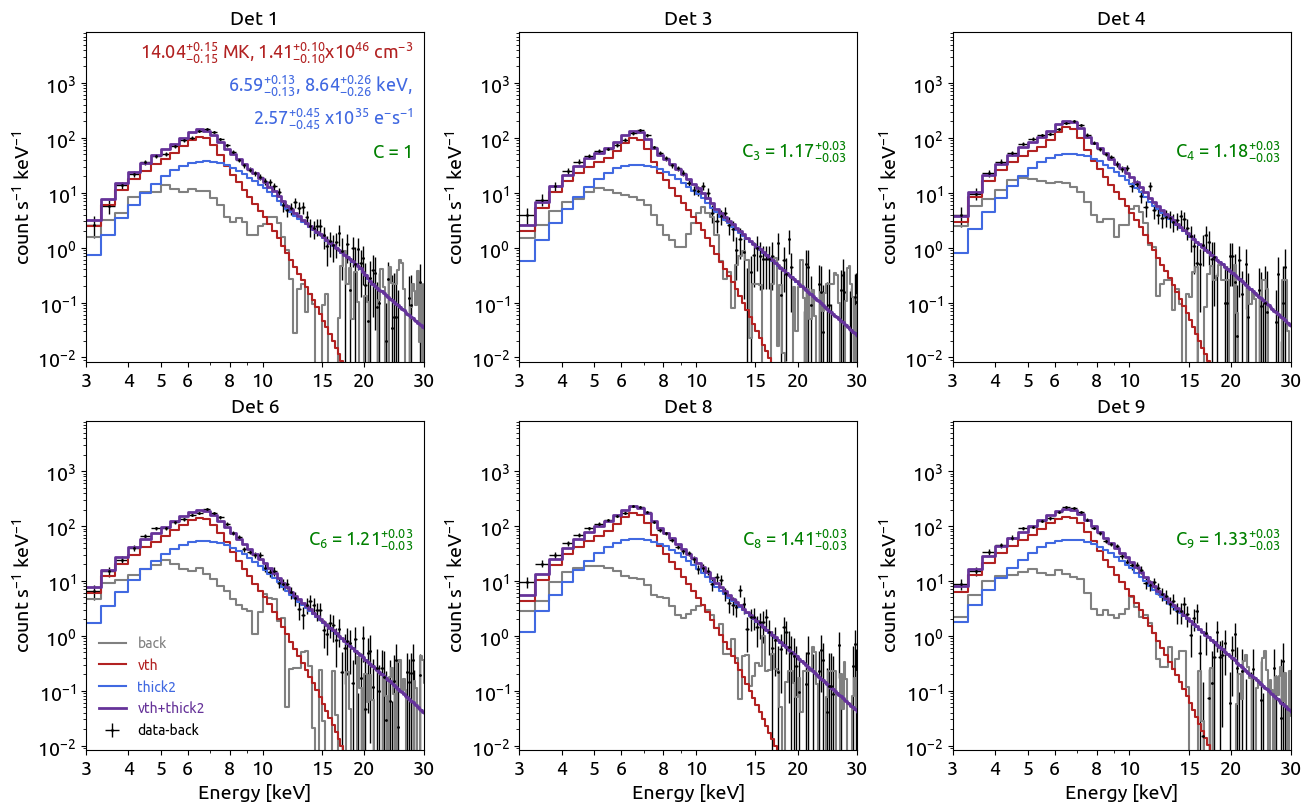

In [48]:
plt.rc('font', family='sans-serif', weight='normal', size=14)
fig, axes = plt.subplots(2, 3, figsize=(13, 8), constrained_layout=True)
clist = []
cuplist = []
cdnlist = []
frozendet=1
detlist = np.array([1,3,4,6,8,9])

ylims=np.array([5e-2,5e4])/6.
xlim=[3,30]
for s, ax in zip(range(6), axes.flat):
    plt.subplots
    c=spec.params["C_spectrum"+str(int(s+1))]["Value"]

    # Get the data and fits to replot
    engs=spec.plotting_info['spectrum'+str(int(s+1))]['count_channels']
    edels=spec.plotting_info['spectrum'+str(int(s+1))]['count_channel_error']
    rat=spec.plotting_info['spectrum'+str(int(s+1))]['count_rates'] #background + flare
    erat=spec.plotting_info['spectrum'+str(int(s+1))]['count_rate_errors']
    # Currently background returns same values twice ?!?!?! like resid
    backrat=spec.plotting_info['spectrum'+str(int(s+1))]['background_rate'][::2]
    resid=spec.plotting_info['spectrum'+str(int(s+1))]['residuals'][::2] 
    fmd=spec.plotting_info['spectrum'+str(int(s+1))]['count_rate_model']
    sfmd=spec.plotting_info['spectrum'+str(int(s+1))]['submodels'] #[0] is fvth, [1] is fthick2
    fiter=spec.plotting_info['spectrum'+str(int(s+1))]['fitting_range']
    # Sort out the energy binning steps for plotting
    stepe = list()
    for i in range(len(engs)):
        stepe.append(engs[i] - edels[i])
    stepe.append(engs[-1]+edels[-1])
    ns=len(stepe)
    
    #gs_kw = dict(height_ratios=[4,1],hspace=0.02,wspace=0.05)
    plt.rcParams['font.size'] = default_text
    #fig, axs = plt.subplots(ncols=1, nrows=2, constrained_layout=False,
    #                     gridspec_kw=gs_kw,figsize=spec_plot_size)

    ax.errorbar(engs,rat-backrat,xerr=edels,yerr=erat,fmt='.',color='k',lw=1.,ms=2,label='data-back')
    ax.step(stepe[0:ns-1],backrat,where='post',color='grey',lw=1.5,label='back')
    ax.step(stepe[0:ns-1],sfmd[0][0:ns-1],where='post',color='firebrick',label='vth')
    ax.step(stepe[0:ns-1],sfmd[1][0:ns-1],where='post',color='royalblue',label='thick2')
    ax.step(stepe[0:ns-1],fmd[0:ns-1]-backrat,where='post',color='rebeccapurple',lw=2,label='vth+thick2')    
    ax.set_ylabel('count s$^{-1}$ keV$^{-1}$')


    if not s==np.where(detlist==frozendet)[0][0]:
        c=f'{c:4.2f}'
        c_err=[spec.params["C_spectrum"+str(int(s+1))]["Error"][0],spec.params["C_spectrum"+str(int(s+1))]["Error"][1]]
        cups=f'{c_err[1]:4.2f}'
        cdns=f'{c_err[0]:4.2f}'
        dd=f'{detlist[s]}'
        ax.text(0.97,0.62,"C$_{"+dd+"}$ = "+c+'$^{+'+cups+'}_{-'+cdns+'}$',\
            color='g',ha='right',transform=ax.transAxes,size=13)
    else:
        ax.text(0.97,0.92,tmks+'$^{+'+tmkups+'}_{-'+tmkdns+'}$ MK, '+\
            ems+'$^{+'+emups+'}_{-'+emdns+'}$x10$^{46}$ cm$^{-3}$',\
            color='firebrick',ha='right',transform=ax.transAxes,size=13)

        ax.text(0.97,0.82,inds+'$^{+'+indups+'}_{-'+inddns+'}$, '+\
            ecs+'$^{+'+ecups+'}_{-'+ecdns+'}$ keV, ',
            color='royalblue',ha='right',transform=ax.transAxes,size=13)
        ax.text(0.97,0.72,nts+'$^{+'+ntups+'}_{-'+ntdns+'}$ x10$^{35}$ e$^{-}$s$^{-1}$',\
            color='royalblue',ha='right',transform=ax.transAxes,size=13)
        c=1
        c_err=[0,0]
        ax.text(0.97,0.62,"C = 1",\
            color='g',ha='right',transform=ax.transAxes,size=13)
    if s > 2:
        ax.set_xlabel("Energy [keV]")
    if s ==3:
        ax.legend(loc=3,labelcolor='linecolor',frameon=False,prop={'size': 10})

    clist.append(float(c))
    cuplist.append(c_err[0])
    cdnlist.append(c_err[1])

    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylim(ylims)
    ax.set_xlim(xlim)
    ax.set_xticks([3,4,5,6,8,10,15,20,30])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax.set_title("Det " + str(detlist[s]),size=14)
plt.savefig('20030725_vth_thick2_ex_detsim.pdf',bbox_inches='tight')
plt.show()